# Capstone Project Report on GPUs
Written by Jason Huang

## Summary
This report aims to answer questions on GPU that is usually installed on computers.  The data is obtained from the link https://www.kaggle.com/iliassekkaf/computerparts.  Only the dataset about the GPUs is used, not the CPUs.  This Jupyter Notebook report will answer the following three questions I have regarding this dataset:
1. How do the GPU processing power affect the price?
2. How has the usage of resources changed over time? 
3. In the GPU market, on average who produced the best processing power per energy spent?

This report will first clean up the data to remove any extreme outliers.  The "NaN" values will all be replaced with the number 0.  Then, all the values with "0" will be removed so the data is readable.


## Cleaning Data
Due to a typo in dataset line 954 was modified by shifting the line forward by one cell (GCN 1.1 Grenada XT).

In [2]:
# Libraries to Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Functions to Use
def replace(column):
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('\n', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].str.replace('-', '0')
    df[column] = df[column].str.replace('GB/sec', '')
    df[column] = df[column].str.replace('1000MB/sec', '1')
    df[column] = df[column].str.replace('880MB/sec', '0.88')
    df[column] = df[column].str.replace('800MB/sec', '0.8')
    df[column] = df[column].str.replace('MB', '')
    df[column] = df[column].str.replace('Bit', '')
    df[column] = df[column].str.replace('MHz', '')
    df[column] = df[column].str.replace('Watts', '')
    df[column] = df[column].fillna(0)
    df[column] = df[column].apply(pd.to_numeric)
    
def date_replace(column):
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('\n', '')
    df[column] = df[column].str.replace('\t', '')
    df[column] = df[column].str.replace('UnknownReleaseDate', '0')
    df[column] = df[column].str.replace('Jan', '01')
    df[column] = df[column].str.replace('Feb', '02')
    df[column] = df[column].str.replace('Mar', '03')
    df[column] = df[column].str.replace('Apr', '04')
    df[column] = df[column].str.replace('May', '05')
    df[column] = df[column].str.replace('Jun', '06')
    df[column] = df[column].str.replace('Jul', '07')
    df[column] = df[column].str.replace('Aug', '08')
    df[column] = df[column].str.replace('Sep', '09')
    df[column] = df[column].str.replace('Oct', '10')
    df[column] = df[column].str.replace('Nov', '11')
    df[column] = df[column].str.replace('Dec', '12')
    df[column] = df[column].fillna(0)

# Calculate the T-test
def t_test(sample1, sample2):
    # Compute the difference between the two sample means.
    diff = sample2.mean() - sample1.mean()
    print('The difference between two sample mean is {}.'.format(diff))
    # Create the arrays to calculate the standard error of difference.
    size = np.array([len(sample1), len(sample2)])
    sd = np.array([sample1.std(), sample2.std()])
    print('The arrary for size is {}.'.format(size))
    print('The array for standard deviation is {}.'.format(sd))
    # Standard Error equation is squared standard deviations 
    # divided by sample size, summed, then square rooted.
    diff_se = (sum((sd ** 2) / size)) ** 0.5
    print('The standard error of this dataset is {}.'.format(diff_se))
    # T-Value is difference between means divided by Standard Error
    print('The T-value of this dataset is {}.'.format(diff / diff_se))
    
# Create a dataframe and import the dataset.
df = pd.read_csv('All_GPUs.csv')

# Remove name tags and replace NaN with 0.
replace('Release_Price')
replace('Memory')
replace('Memory_Bandwidth')
replace('Memory_Bus')
replace('Core_Speed')
replace('Memory_Speed')
replace('Max_Power')
date_replace('Release_Date')

#Testing room
#print(df['Release_Price'][170:190])
#print(df['Memory'])
#print(df['Core_Speed'])
#print(df['Max_Power'])
#print(df['Memory_Speed'])
#print(df['Release_Date'][130:170])
#df

## Section 1

### Overview
This section will answer the question of how the GPU processing power affects the price.

GPU processing power cannot simply be calculated by looking at a column, such as "Memory", and assuming that it is the GPU processing power in its entirety.  Usually, it is a combination of factors that makes up the GPU processing power.
For the sake of simplicity, this report will use "Release Price" column as the variable factor on the Y axis of the next few scatterplots.  Meanwhile, the X axis will be reserved for all hardware specs of the GPUs.

We will first compare GPU memory size to released price, to see if increased memory size means a direct increase of cost.

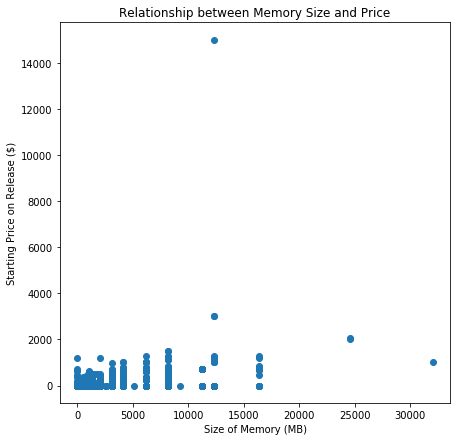

In [3]:
plt.figure(figsize=(7, 7))
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')
plt.show()

### Analysis of Relationship between Memory Size and Price
The graph above simply uses a scatter plot to plot the relationship between the size of memory and released price. 

However, the scatterplot is hard to see clearly due to the one outlier that is sitting outside far from the rest of the data.  Also, it is simply not possible for a single GPU to cost more than 14000 USD.  Upon closer look at the dataset, it was discovered that this outlier is priced at 14999 USD; however, there are some GPUs priced at 1499 USD.  Therefore, we can assume that this must be a typo in the dataset.  The dataset will be modified to remove this outlier.

The report will also remove all the the zeros that occur in the dataset upon plotting them.  If we were to look at the earlier plot, we will see a large number of zero dollar values spread throughout all levels of memory size.  Since we stated earlier that all "NaN" (empty values) have been replaced with zeros, it will make sense to simply remove these for clarity.

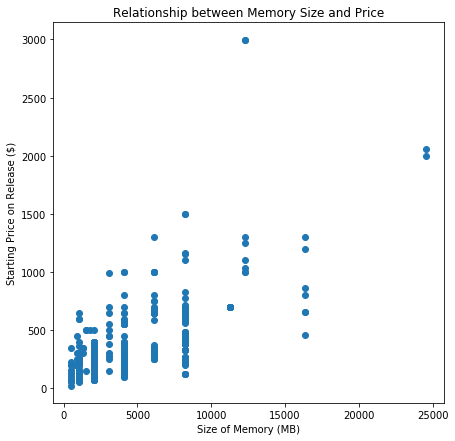

The difference between two sample mean is -4252.10323607427.
The arrary for size is [377 377].
The array for standard deviation is [ 3350.33962181   342.49714256].
The standard error of this dataset is 173.45054771986528.
The T-value of this dataset is -24.514787021265064.


In [3]:
# Modified dataframe to remove extreme outlier and any zero.
df = df[df.Memory != 0]
df = df[df.Core_Speed != 0]
df = df[df.Release_Price != 0]
df = df[df.Release_Price != 14999]

# Plot new dataframe
plt.figure(figsize=(7, 7))
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')
plt.show()

# Perform the T-Test
sample1 = df['Memory'].sample(frac=0.8)
sample2 = df['Release_Price'].sample(frac=0.8)
t_test(sample1, sample2)

### Analysis of Relationship between Memory Size and Price (data cleaned)
This plot still shows the relationship between the size of memory in MB and price in USD.  However, the outlier and zeros have been removed.

It seems that as GPU memory size increases, prices generally increases linearly.  With a large T-value, there is a large evidence against the null hypothesis that there is no significant difference between the means of Memory Size and Released Price.  This means that the assumption that any kind of difference or significance seen in a set of data being due to chance is likely wrong, or that there simply is a significant difference.  We can also note that as more total sizes of memory is made per GPU, less GPU are made.

### Relationship between Memory Bandwidth and Released Price
The next plot will map out the relationship between memory bandwidth and released price.

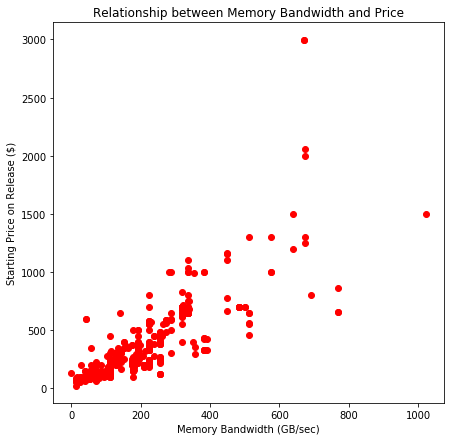

The difference between two sample mean is -4277.640557029178.
The arrary for size is [377 377].
The array for standard deviation is [ 3357.05959881   299.46603035].
The standard error of this dataset is 173.58391860760779.
The T-value of this dataset is -24.643069423377444.


In [4]:
# Plot new dataframe
plt.figure(figsize=(7, 7))
plt.scatter(x=df['Memory_Bandwidth'], y=df['Release_Price'], color='red')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bandwidth (GB/sec)')
plt.title('Relationship between Memory Bandwidth and Price')
plt.show()

# Perform the T-Test
sample3 = df['Memory'].sample(frac=0.8)
sample4 = df['Release_Price'].sample(frac=0.8)
t_test(sample3, sample4)

### Analysis of Relationship between Memory Bandwidth and Price
This plot still shows the relationship between the size of memory bandwidth in GB/sec and price in USD.  Unlike the earlier plot, the data points are more clustered together in a linear fashion.  If we were to use a correlation function, we would very likely find that the correlation will be strong.

It seems that as GPU memory size increases, prices generally increases linearly.  With a large T-value, there is a large evidence against the null hypothesis that there is no significant difference between the means of Memory Bandwidth and Released Price.  This means that the assumption that any kind of difference or significance seen in a set of data being due to chance is likely wrong, or that there simply is a significant difference.  We can also note that as more total sizes of memory is made per GPU, less GPU are made.

### Relationship between Memory Bus and Released Price
The next plot will map out the relationship between memory bandwidth and released price.  Will the effect of increasing memory bus be similar to the earlier two graphs as it increase?  Perhaps it will end up in a gradual fashion too.

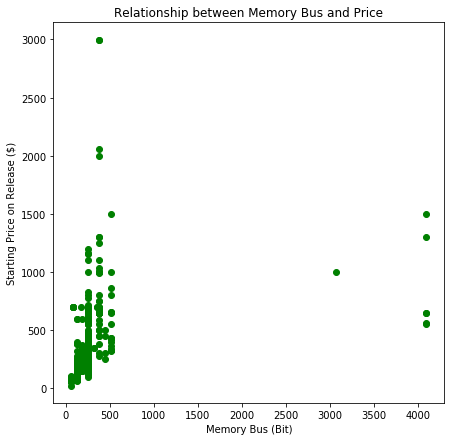

The difference between two sample mean is 67.16214437367262.
The arrary for size is [471 471].
The array for standard deviation is [ 463.71121201  328.76365091].
The standard error of this dataset is 26.191910807140008.
The T-value of this dataset is 2.56423232608764.


In [5]:
# Plot new dataframe
plt.figure(figsize=(7, 7))
plt.scatter(x=df['Memory_Bus'], y=df['Release_Price'], color='green')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bus (Bit)')
plt.title('Relationship between Memory Bus and Price')
plt.show()
# Perform the T-Test
t_test(df['Memory_Bus'], df['Release_Price'])

###  Analysis of Relationship between Memory Bus and Released Price
The plot shows a much more extreme relationship, where The cost of GPU shot up immediately when most of the GPUs begin to have around 500 bits in memory bus.  Meanwhile, we do have about 5 outliers in which a large amount of memory bus did not result in an immediate increase of price.

Memory Bus is what allows for more effecient communication between the main memory and the processing unit.

### Relationship between GPU Processor Clock Speed and Released Price
GPU processor clock speed is also defined as the core speed.  It is essentially the part of GPU that does heavy calculations.

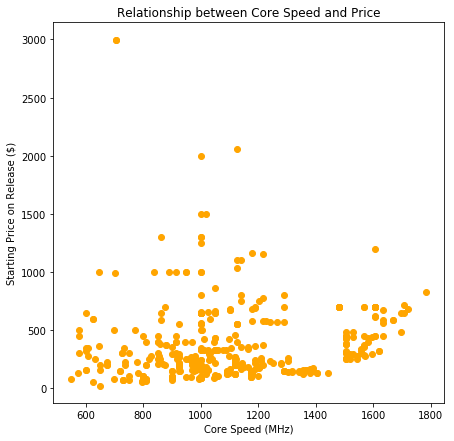

The difference between two sample mean is -748.428089171975.
The arrary for size is [471 471].
The array for standard deviation is [ 259.36617095  328.76365091].
The standard error of this dataset is 19.295244829439664.
The T-value of this dataset is -38.78821418373832.


In [6]:
plt.figure(figsize=(7, 7))
plt.scatter(x=df['Core_Speed'], y=df['Release_Price'], color='orange')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Core Speed (MHz)')
plt.title('Relationship between Core Speed and Price')
plt.show()
# Perform the T-Test
t_test(df['Core_Speed'], df['Release_Price'])

print('Quite unlike all memory resources, the chart varies widely.')

###  Analysis of Relationship between GPU Processor Clock Speed and Released Price
The plot shows a very broad relationship in the relationship between GPU processor clock speed and released price.  The correlation is not strong at all.  In general, as the clock speed increases, the price also increase, albeit slowly.

### Relationship between all 4 charts
The next section will show how all four charts will relate to each other in by putting them side by side.

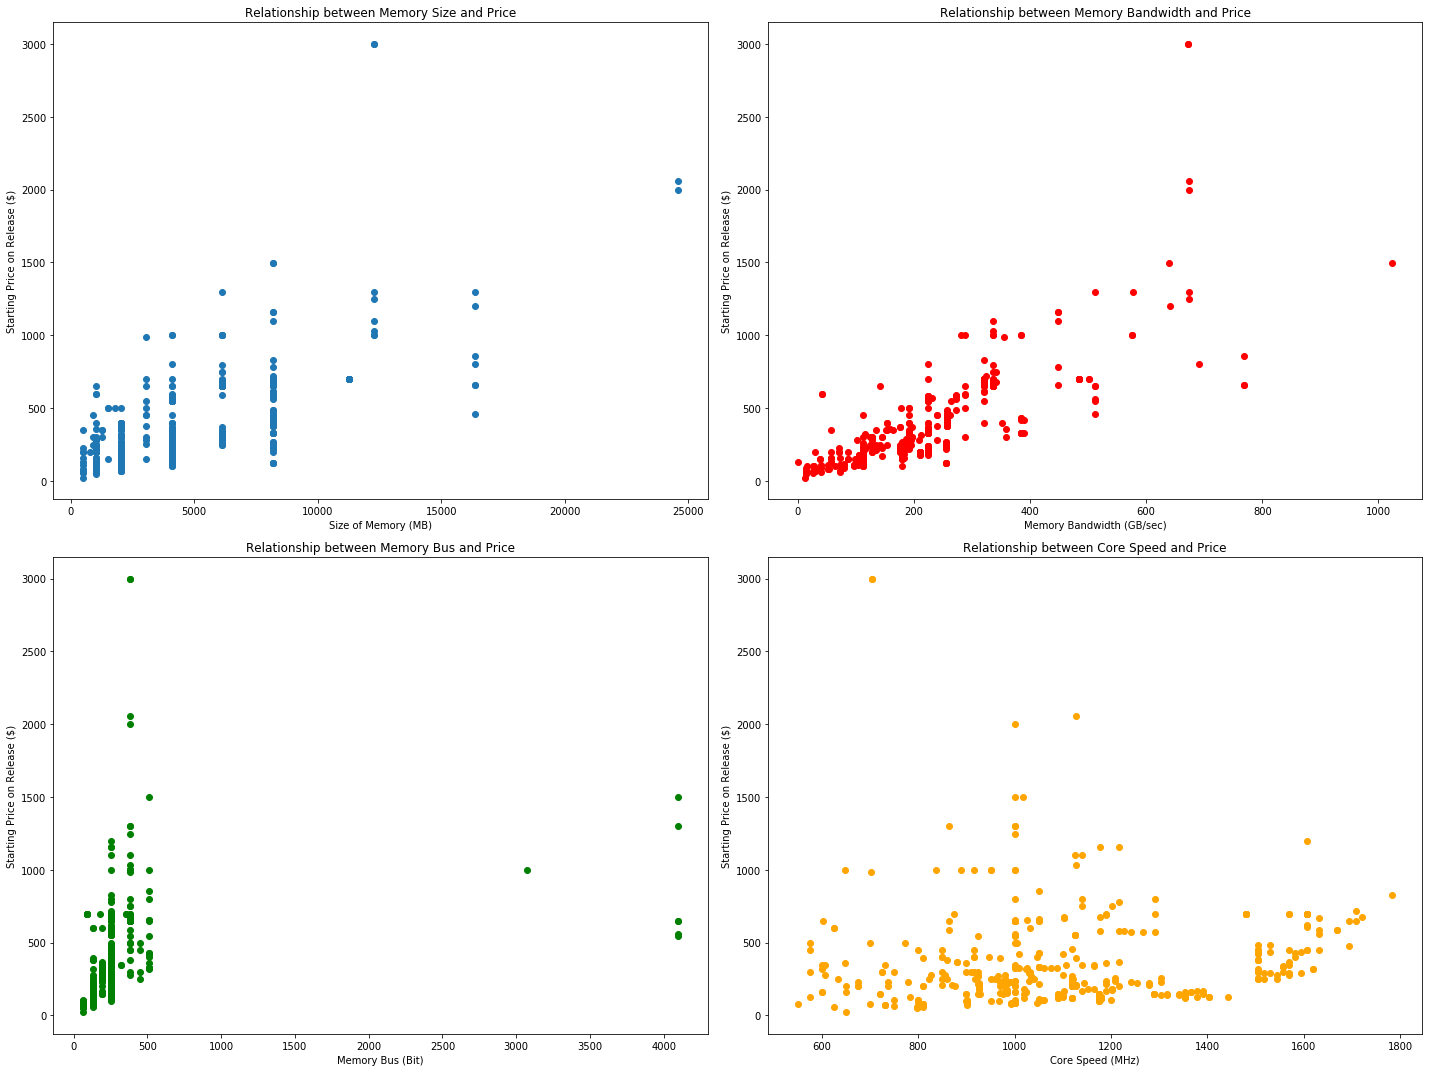

In [7]:
# Plot new dataframe
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')

plt.subplot(2, 2, 2)
plt.scatter(x=df['Memory_Bandwidth'], y=df['Release_Price'], color='red')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bandwidth (GB/sec)')
plt.title('Relationship between Memory Bandwidth and Price')

plt.subplot(2, 2, 3)
plt.scatter(x=df['Memory_Bus'], y=df['Release_Price'], color='green')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bus (Bit)')
plt.title('Relationship between Memory Bus and Price')

plt.subplot(2, 2, 4)
plt.scatter(x=df['Core_Speed'], y=df['Release_Price'], color='orange')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Core Speed (MHz)')
plt.title('Relationship between Core Speed and Price')

plt.tight_layout()
plt.show()

### Analysis of relationship between all 4 charts of GPU performance and price
In general, higher performance in GPU resources in memory size, memory bandwidth, memory bus, and core speed means higher prices.  We do not see a decrease in the relationship.  We can say that GPU performances therefore affects the price positively.

### Boxplots of the relationship between the 4 charts of GPU performance and price
The next section will investigate how the boxplots will look when it is a type of plot that can identify outliers more clearly.  We can see that in general, there are quite a lot of outliers for each boxplots.  25% percentile to 75% percentail of the boxplots for all four are generally in the lower range.  This is especially true for all GPU resources related to memory.  For the core speed, we can see the range is much more wider, resulting in a larger boxplot.

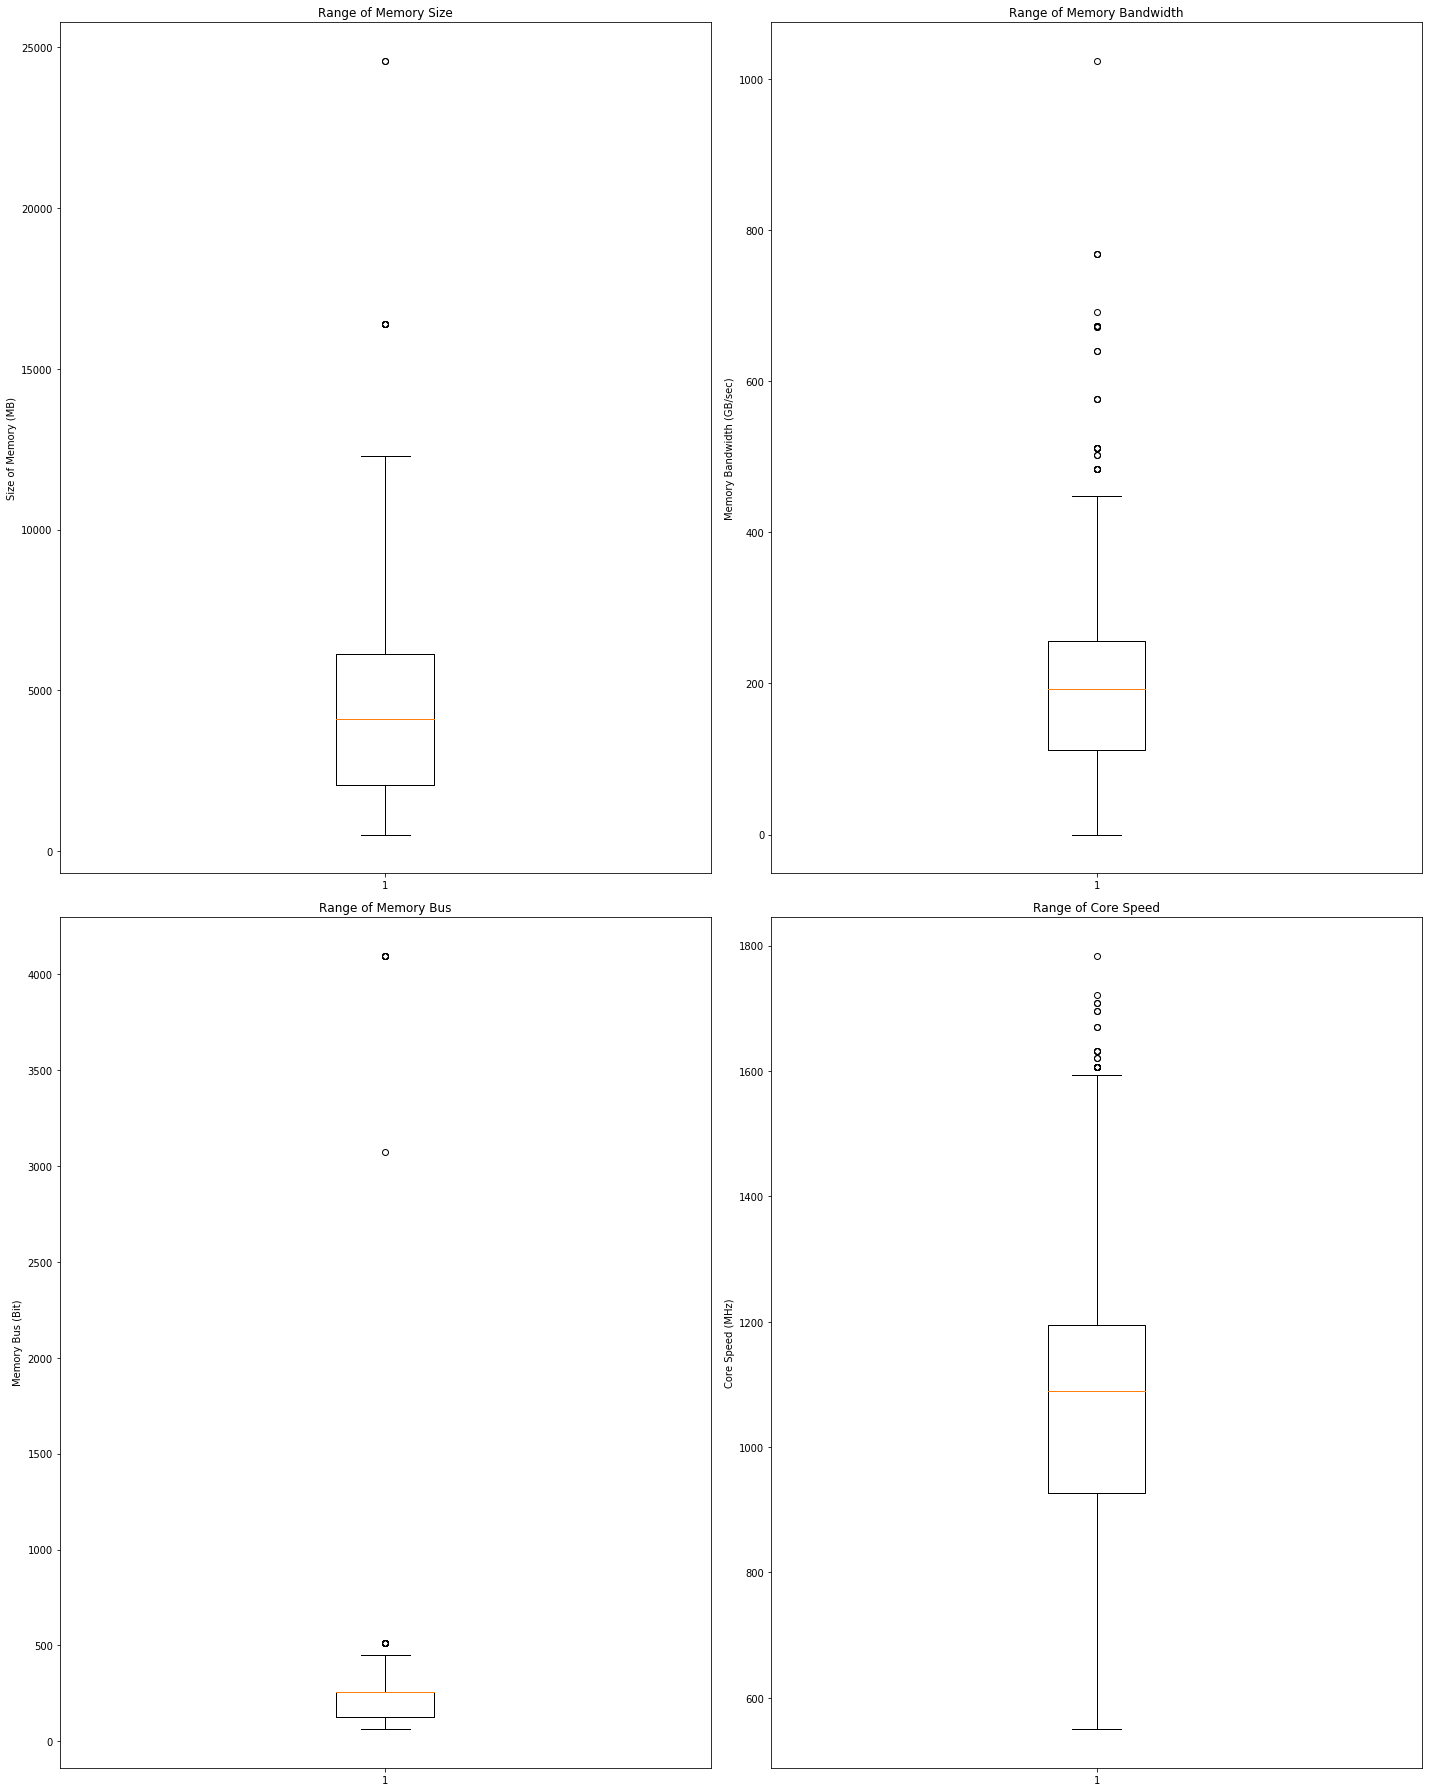

In [10]:
# Plot original dataframe
plt.figure(figsize=(20, 25))

plt.subplot(2, 2, 1)
plt.boxplot(df['Memory'])
plt.ylabel('Size of Memory (MB)')
plt.title('Range of Memory Size')

plt.subplot(2, 2, 2)
plt.boxplot(df['Memory_Bandwidth'])
plt.ylabel('Memory Bandwidth (GB/sec)')
plt.title('Range of Memory Bandwidth')

plt.subplot(2, 2, 3)
plt.boxplot(df['Memory_Bus'])
plt.ylabel('Memory Bus (Bit)')
plt.title('Range of Memory Bus')

plt.subplot(2, 2, 4)
plt.boxplot(df['Core_Speed'])
plt.ylabel('Core Speed (MHz)')
plt.title('Range of Core Speed')

plt.tight_layout()
plt.show()

### Bar graph of GPU core speed
GPU core speed is essentially clock speed, so here we count the most MHz at clock speed.  The graph is a bit skewed right as we can see below.  This means that majority of the GPU made over time are between the 25% to 50% percentile range.  We can also note a smaller range of GPU made in the higher spectrum of core speed.

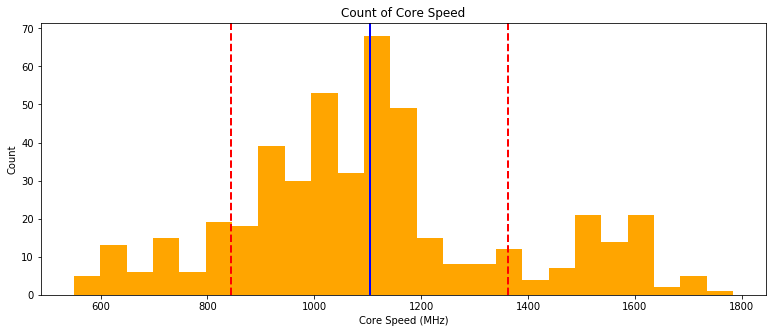

In [11]:
plt.figure(figsize=(13, 5))
plt.hist(df['Core_Speed'], bins=25, color='orange')
plt.axvline(df['Core_Speed'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['Core_Speed'].mean() + df['Core_Speed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['Core_Speed'].mean() - df['Core_Speed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.ylabel('Count')
plt.xlabel('Core Speed (MHz)')
plt.title('Count of Core Speed')
plt.show()

## Section 2

### Overview
In this section, we want to review how the GPU resources have been changed over time.  There is a possibility, based on Section 1's information, that the increase of price will affect how performance resources are allocated for the GPUs.  We could assume that higher price means relative increase of GPU performance and resources, in which we could plot price to date as a test to see if this works

### Count of GPU released by date
The next plot shows the count of GPU released by dates.  In general, we see a large count of GPU released in the range of 2014 to 2015.  However, this is extremely hard to read and does not plot the resources.

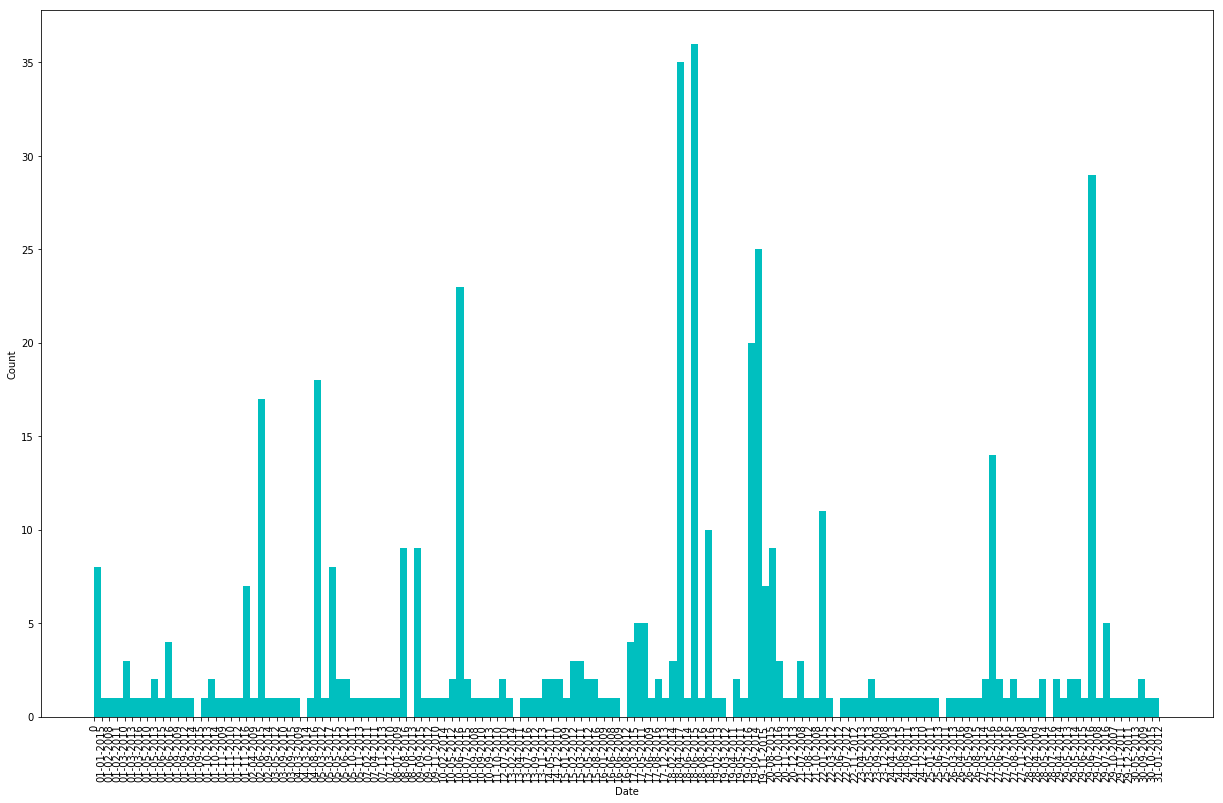

In [16]:
plt.figure(figsize=(21, 13))
plt.hist(df['Release_Date'], bins=150, color='c')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

### Relationship between Release Date and Price
The next plot shows the relationship between the GPU release date and price.  We can see that in general there is very little correlation between the two factors.

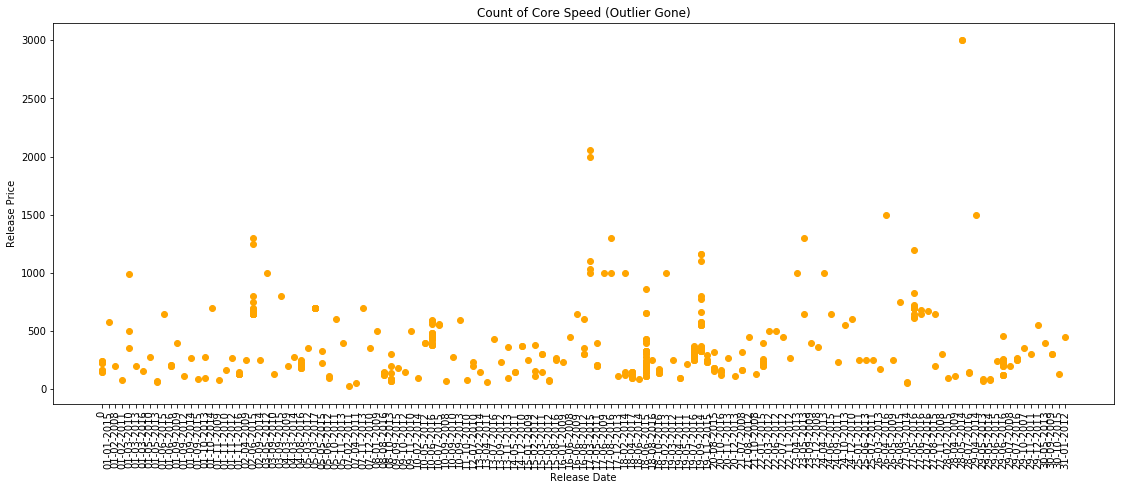

In [22]:
# Plot release price against release date
plt.figure(figsize=(19, 7))
plt.scatter(x=df['Release_Date'], y=df['Release_Price'], color='orange')
plt.ylabel('Release Price')
plt.xlabel('Release Date')
plt.xticks(rotation=90)
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()

### Relationship between Core Speed and Memory Speed
The next plot will simply compare GPU core speed and memory speed, since both use the same measurements in speed as MHz.  This is where we can apply the T-Test and pick only samples from both both parts.

###  Analysis of Relationship between Core Speed and Memory Speed
With a large T-value, there is a large evidence against the null hypothesis that there is no significant difference between the means of Core Speed and Memory Speed.  This means that the assumption that any kind of difference or significance seen in a set of data being due to chance is likely wrong, or that there simply is a significant difference.

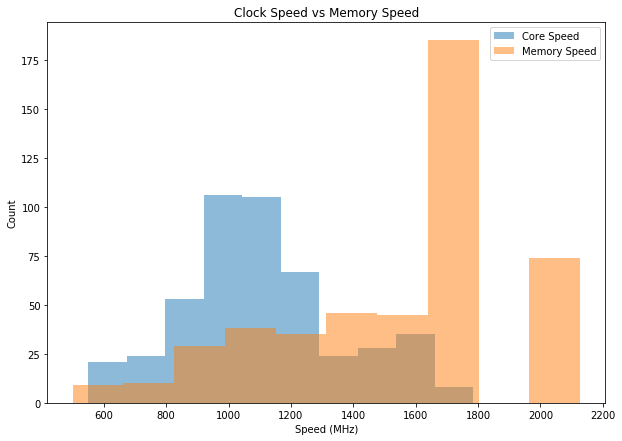

The difference between two sample mean is 438.95753715498927.
The arrary for size is [471 471].
The array for standard deviation is [ 259.36617095  367.87402899].
The standard error of this dataset is 20.74013268265341.
The T-value of this dataset is 21.164644598543173.


In [25]:
# Compare the core speed to memory speed with both as MHz.
plt.figure(figsize=(10, 7))
plt.hist(df['Core_Speed'], alpha=0.5, label='Core Speed')
plt.hist(df['Memory_Speed'], alpha=0.5, label='Memory Speed')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Speed (MHz)')
plt.title('Clock Speed vs Memory Speed')
plt.show()
# Perform the T-Test
t_test(df['Core_Speed'], df['Memory_Speed'])

## Section 3

### Overview
This section attempts to find out whether the processing power per energy spent is improving.

### Relationship between Maximum Power and Release Date
The next plot will simply compare Maximum Power Used in wattage to date.  Since the plot shows a healthy scattering of the points, the power used did not change drastically over time.  Since resources require power, this could signify that either the GPU resources themselves are becoming more efficient in using power over time or that the Power Supply Unit (not part of the GPU) has been improved to accomodate the GPUs' resources.

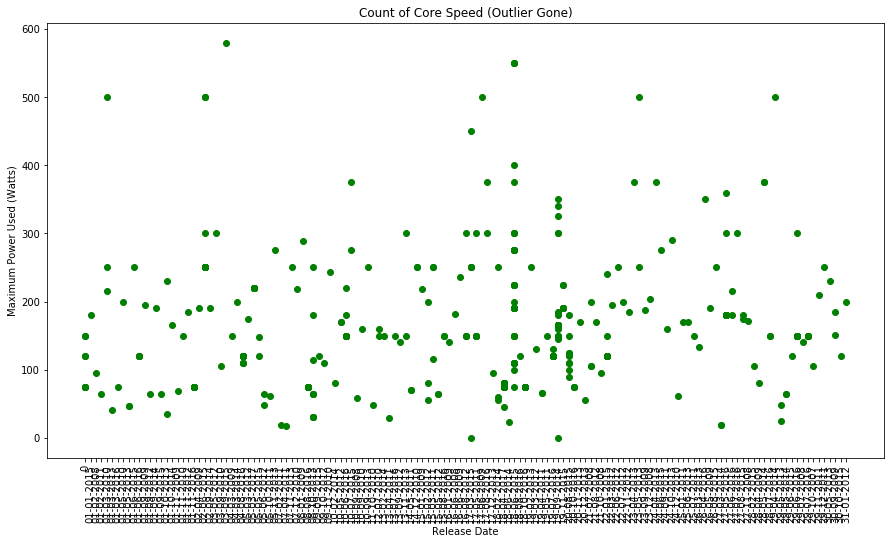

In [27]:
# Modified dataframe to compare Maximum Power and Date
plt.figure(figsize=(15, 8))
plt.scatter(x=df['Release_Date'], y=df['Max_Power'], color='green')
plt.ylabel('Maximum Power Used (Watts)')
plt.xlabel('Release Date')
plt.xticks(rotation=90)
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()

### Relationship between Maximum Power and Core Speed
This plot checks to see how the maximum power available affects the speed of the processing unit.  As we can see, it is not always the case that more power means faster speed.  The spread of this plot shows that there are quite a lot of inefficient GPUs.

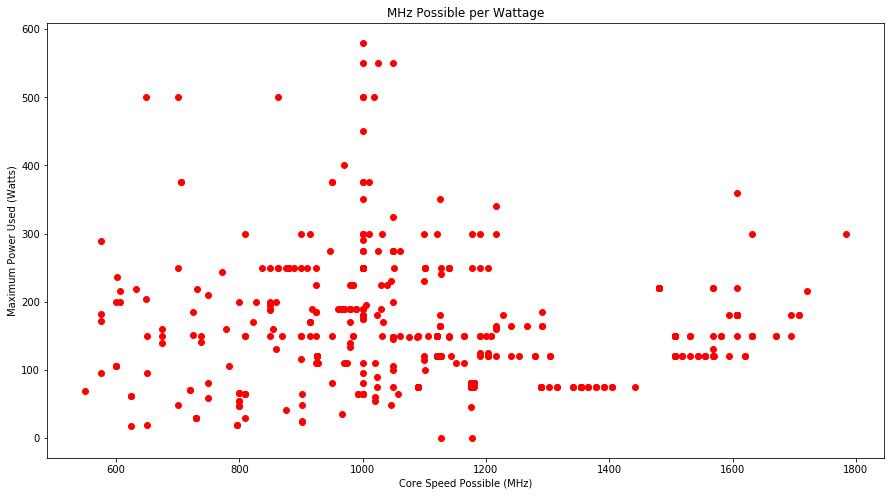

In [28]:
# There are two types of power to read: PSU and Max Power.  PSU has too many holes, compare Max Power instead. 
plt.figure(figsize=(15, 8))
plt.scatter(x=df['Core_Speed'], y=df['Max_Power'], color='red')
plt.ylabel('Maximum Power Used (Watts)')
plt.xlabel('Core Speed Possible (MHz)')
plt.title('MHz Possible per Wattage')
plt.show()

### Comparison of Core Speed and Maximum Power
This graph shows even more clearly that in general, an increase of power means an increase in core speed.  However, between the range of 2000 to 2500 Row Count of Dataset (Each Unique GPU), we can see that the Core Speed is able to spike extremely high without requiring much power (low Max Power).  Therefore, it is possible to attain highly efficient GPUs.

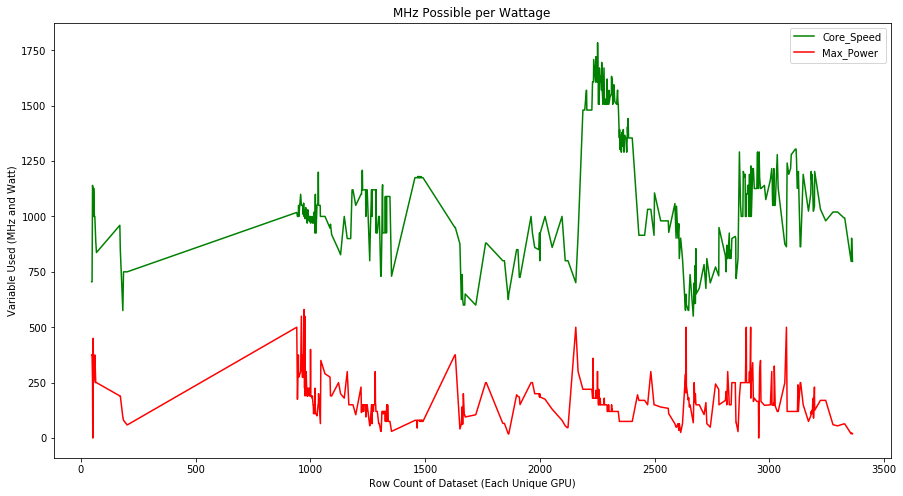

In general, we can see the released price increasing over time.


In [23]:
# Now compare Core Speed to Max Power.
plt.figure(figsize=(15, 8))
plt.plot(df['Core_Speed'], color='green')
plt.plot(df['Max_Power'], color='red')
plt.ylabel('Variable Used (MHz and Watt)')
plt.xlabel('Row Count of Dataset (Each Unique GPU)')
plt.title('MHz Possible per Wattage')
plt.legend(loc='upper right')
plt.show()
print('In general, we can see the released price increasing over time.')

### Another graph of Core Speed and Maximum Power

In general, we can see the released price increasing over time.


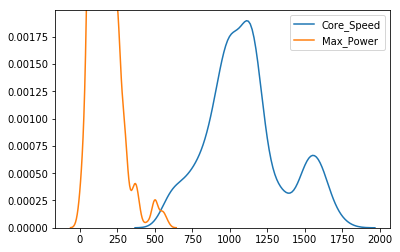

In [78]:
https://github.com/nyejyh/ThinkfulFiles/tree/master/Unit%203%202.6%2C%20Drill%20Challenge%20(Exercises%20in%20Bayes'%20Rule)%20%7C%20Unit%203%202.7%20(Evaluating%20Data%20Sources)# Now compare Core Speed to Max Power.

# Initialize Figure and Axes object
ax = sns.kdeplot(df['Core_Speed'])
ax = sns.kdeplot(df['Max_Power'])
print('In general, we can see the released price increasing over time.')

### General Summary

In [50]:
df.describe()

,Core_Speed,DVI_Connection,DisplayPort_Connection,HDMI_Connection,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Open_GL,Release_Price,Shader,TMUs,VGA_Connection
count,471.000000,471.000000,315.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,433.000000,471.000000,471.000000
mean,1103.335456,1.229299,1.866667,1.016985,160.643312,4610.989384,212.712951,287.745223,1542.292994,4.428450,354.907367,4.952656,98.505308,0.065817
std,259.366171,0.689180,1.148802,0.356890,92.347725,3404.091140,139.869777,463.711212,367.874029,0.247879,328.763651,0.210156,53.692341,0.248226
min,550.000000,0.000000,0.000000,0.000000,0.000000,512.000000,0.000000,64.000000,500.000000,3.300000,23.000000,4.000000,8.000000,0.000000
25%,926.000000,1.000000,1.000000,1.000000,95.000000,2048.000000,112.000000,128.000000,1251.000000,4.500000,150.000000,5.000000,56.000000,0.000000
50%,1090.000000,1.000000,2.000000,1.000000,150.000000,4096.000000,192.200000,256.000000,1750.000000,4.500000,249.000000,5.000000,80.000000,0.000000
75%,1195.000000,2.000000,3.000000,1.000000,190.000000,6144.000000,256.300000,256.000000,1753.000000,4.500000,449.000000,5.000000,136.000000,0.000000
max,1784.000000,4.000000,4.000000,3.000000,580.000000,24576.000000,1024.000000,4096.000000,2127.000000,4.500000,2999.000000,5.000000,320.000000,1.000000


### Conclusion
In general, we can say that the price greatly affects the GPU resources.  The usage of resources generally improves, but not necessarily at the cost of more power in wattage.  Over time, GPU shows a general efficiency with the processing power per energy spent.